In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
db = pd.read_csv("./datasets/paysim.csv")

In [40]:
db.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [41]:
len(db)

6362620

In [42]:
# No. of records whose orig change and dest change dont match AND are flagged fraud.
db[(db.newbalanceOrig - db.oldbalanceOrg) != (db.newbalanceDest - db.oldbalanceDest)].isFraud.sum()

8181

In [44]:
legit_db = db[db.isFraud==0]
fraud_db = db[db.isFraud==1]

<Axes: xlabel='amount', ylabel='Count'>

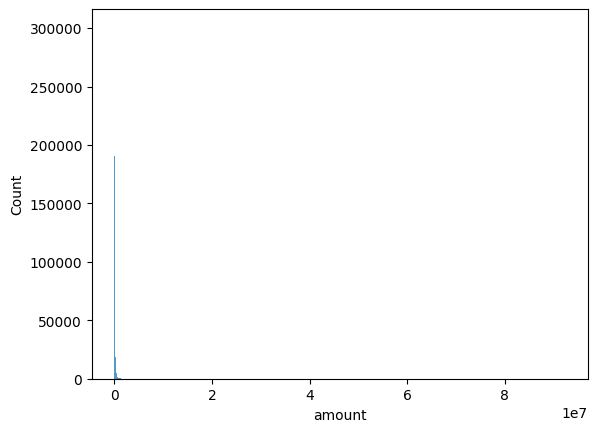

In [45]:
sns.histplot(legit_db.amount)

/tmp/ipykernel_36237/357581882.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  legit_db.amount = StandardScaler().fit_transform(legit_db.amount.values.reshape(-1,1))


<Axes: xlabel='amount', ylabel='Count'>

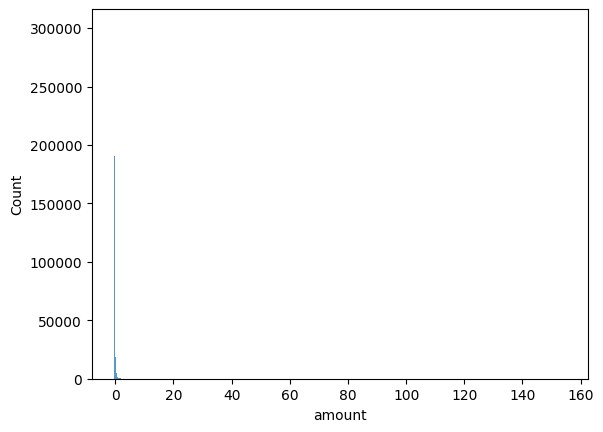

In [46]:
# Too skewed
from sklearn.preprocessing import StandardScaler

legit_db.amount = StandardScaler().fit_transform(legit_db.amount.values.reshape(-1,1))

# legit_db.amount = np.log(legit_db.amount)
sns.histplot(legit_db.amount) #Visual Analysis -> 2 Clusters

In [20]:
# Calculating Elbow Plot 
inertias = []

from sklearn.cluster import KMeans

for i in range(1,10):
    print(f"{i} Clusters")
    model = KMeans(n_clusters=i)
    model.fit(legit_db.amount.values.reshape(-1,1))
    inertias += [model.inertia_]

1 Clusters


/home/lemon/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


2 Clusters


/home/lemon/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


3 Clusters


/home/lemon/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


4 Clusters


/home/lemon/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


5 Clusters


/home/lemon/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


6 Clusters


/home/lemon/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


7 Clusters


/home/lemon/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


8 Clusters


/home/lemon/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


9 Clusters


/home/lemon/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


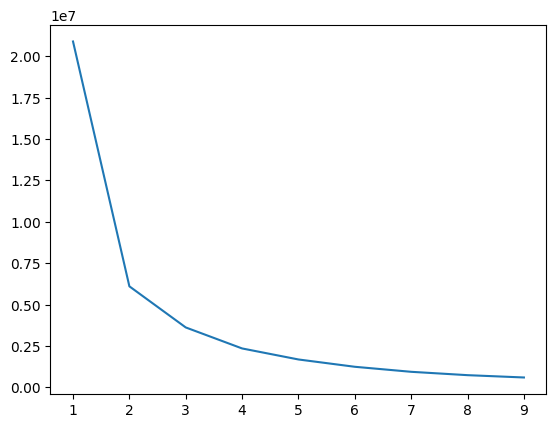

In [47]:
# Elbow Plot
plt.plot(np.arange(1,10),inertias) # 3 Clusters

In [29]:
from sklearn.mixture import GaussianMixture

model = GaussianMixture(n_components=2,init_params="kmeans")
legit_db["classes"] = model.fit_predict(legit_db.amount.values.reshape(-1,1))

/tmp/ipykernel_36237/3967203041.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  legit_db["classes"] = model.fit_predict(legit_db.amount.values.reshape(-1,1))


<Axes: xlabel='classes', ylabel='amount'>

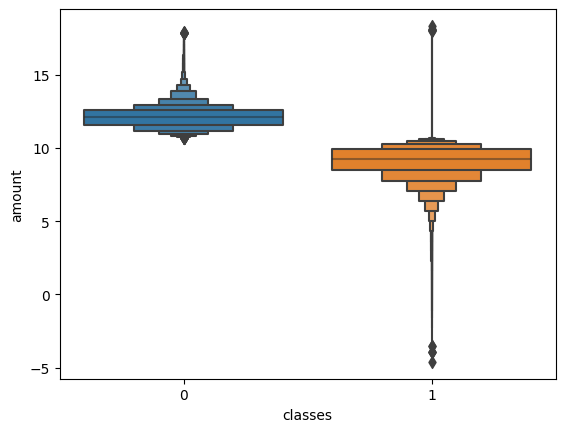

In [36]:
sns.boxenplot(x=legit_db.classes, y=legit_db.amount)

<Axes: xlabel='amount', ylabel='Count'>

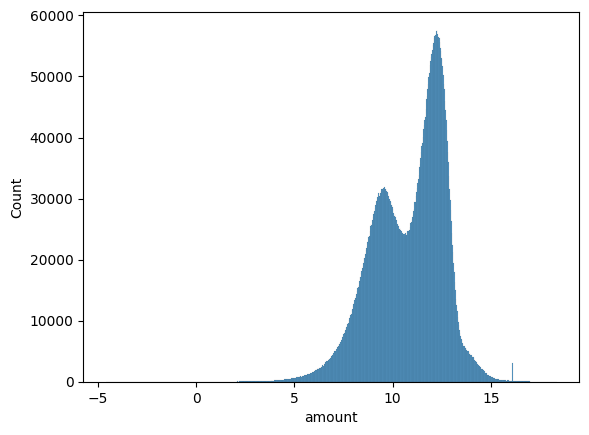

In [28]:
sns.histplot(legit_db.amount)